In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np

2023-09-17 13:24:29.814308: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/janhavidalal/opt/anaconda3/envs/myenv/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataset,info = tfds.load('glue/sst2',with_info=True)

2023-09-17 13:24:39.663850: W tensorflow/core/platform/cloud/google_auth_provider.cc:184] All attempts to get a Google authentication bearer token failed, returning an empty token. Retrieving token from files failed with "NOT_FOUND: Could not locate the credentials file.". Retrieving token from GCE failed with "FAILED_PRECONDITION: Error executing an HTTP request: libcurl code 6 meaning 'Couldn't resolve host name', error details: Could not resolve host: metadata".


Dl Completed...: 0 url [00:00, ? url/s]
Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...:   0%|                                  | 0/1 [00:00<?, ? url/s]
Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Size...:   0%|                                       | 0/7 [00:00<?, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]
Dl Size...:  14%|████▍                          | 1/7 [00:00<00:05,  1.12 MiB/s]

Dl Size...:  29%|████████▊                      | 2/7 [00:00<00:04,  1.12 MiB/s]

Dl Size...:  43%|█████████████▎                 | 3/7 [00:00<00:03,  1.12 MiB/s]

Dl Size...:  57%|█████████████████▋             | 4/7 [00:00<00:02,  1.12 MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]
Dl Size...:  71%|██████████████████████▏        | 5/7 [00:01<00:00,  6.05 MiB/s]

Dl Size...:  86%|██████████████████████████▌    | 6/7 [00:01<00:00,  6.05 MiB/s]

Extraction completed...: 0 file [00:01, ? file/s]
Dl Size...: 100%|███████████████████████████████| 7/7 [00:01<00:00,  7.87 MiB/s]

D

Generating train examples...:  43%|▍| 28997/67349 [00:02<00:03, 12162.56 example
Generating train examples...:  45%|▍| 30214/67349 [00:02<00:03, 12110.21 example
Generating train examples...:  47%|▍| 31426/67349 [00:02<00:02, 12102.77 example
Generating train examples...:  48%|▍| 32654/67349 [00:02<00:02, 12153.19 example
Generating train examples...:  50%|▌| 33870/67349 [00:02<00:02, 12133.50 example
Generating train examples...:  52%|▌| 35087/67349 [00:03<00:02, 12143.87 example
Generating train examples...:  54%|▌| 36302/67349 [00:03<00:02, 12103.08 example
Generating train examples...:  56%|▌| 37528/67349 [00:03<00:02, 12147.90 example
Generating train examples...:  58%|▌| 38752/67349 [00:03<00:02, 12174.80 example
Generating train examples...:  59%|▌| 39970/67349 [00:03<00:02, 12062.86 example
Generating train examples...:  61%|▌| 41202/67349 [00:03<00:02, 12136.67 example
Generating train examples...:  63%|▋| 42425/67349 [00:03<00:02, 12162.66 example
Generating train examples...

Dataset glue downloaded and prepared to /Users/janhavidalal/tensorflow_datasets/glue/sst2/2.0.0. Subsequent calls will reuse this data.


In [3]:
print(info.features)

FeaturesDict({
    'idx': int32,
    'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    'sentence': Text(shape=(), dtype=string),
})


In [4]:
print(info.features['label'].num_classes)

2


In [5]:
print(info.features['label'].names)

['negative', 'positive']


In [6]:
dataset_train, dataset_validation = dataset['train'],dataset['validation']

In [7]:
dataset_train

<PrefetchDataset element_spec={'idx': TensorSpec(shape=(), dtype=tf.int32, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None), 'sentence': TensorSpec(shape=(), dtype=tf.string, name=None)}>

In [8]:
for example in dataset_train.take(2):
    review,label = example['sentence'],example['label']
    print("Review: ",review)
    print('Label: %d \n'% label.numpy())

Review:  tf.Tensor(b'for the uninitiated plays better on video with the sound ', shape=(), dtype=string)
Label: 0 

Review:  tf.Tensor(b'like a giant commercial for universal studios , where much of the action takes place ', shape=(), dtype=string)
Label: 0 



2023-09-17 13:25:43.419699: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


In [9]:
training_reviews = []
training_labels = []
validation_reviews = []
validation_labels = []

for item in dataset_train.take(10000):
    review,label = item["sentence"], item["label"]
    training_reviews.append(str(review.numpy()))
    training_labels.append(label.numpy())

2023-09-17 13:25:57.956544: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


In [10]:
training_reviews

["b'for the uninitiated plays better on video with the sound '",
 "b'like a giant commercial for universal studios , where much of the action takes place '",
 "b'company once again dazzle and delight us '",
 'b"\'s no surprise that as a director washington demands and receives excellent performances , from himself and from newcomer derek luke "',
 "b', this cross-cultural soap opera is painfully formulaic and stilted . '",
 'b", the film is n\'t nearly as downbeat as it sounds , but strikes a tone that \'s alternately melancholic , hopeful and strangely funny . "',
 "b'only masochistic moviegoers need apply . '",
 "b'convince almost everyone that it was put on the screen , just for them '",
 'b"like the english patient and the unbearable lightness of being , the hours is one of those reputedly `` unfilmable \'\' novels that has bucked the odds to emerge as an exquisite motion picture in its own right . "',
 "b'his supple understanding of the role '",
 "b'revelatory nor truly edgy -- me

In [11]:
training_labels

[0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,


In [13]:
print("Number of training reviews: ",len(training_reviews))

Number of training reviews:  10000


In [14]:
for i in range(0,2):
    print(training_reviews[i])
    print(training_labels[i])

b'for the uninitiated plays better on video with the sound '
0
b'like a giant commercial for universal studios , where much of the action takes place '
0


In [15]:
for item in dataset_validation.take(-1):
    review,label = item["sentence"],item["label"]
    validation_reviews.append(str(review.numpy()))
    validation_labels.append(label.numpy())

In [17]:
print("Number of validation reviews: ",len(validation_reviews))

Number of validation reviews:  872


In [18]:
vocab_size = 4000
embedding_dim = 16
max_length = 50
trunc_type = "post"
pad_type = "post"
oov_tok = "<OOV>"

In [19]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer(num_words=vocab_size,oov_token=oov_tok)
tokenizer.fit_on_texts(training_reviews)
word_index = tokenizer.word_index
print(word_index)

{'<OOV>': 1, "'": 2, 'the': 3, 'and': 4, 'a': 5, 'of': 6, 'b': 7, 'to': 8, "'s": 9, 'in': 10, 'that': 11, 'is': 12, 'it': 13, 'as': 14, "b'a": 15, 'with': 16, 'film': 17, 'movie': 18, 'for': 19, "b'the": 20, 'its': 21, 'an': 22, 'you': 23, 'this': 24, 'but': 25, 'on': 26, 'be': 27, "n't": 28, "b'is": 29, 'by': 30, "b'": 31, 'at': 32, 'not': 33, 'or': 34, 'about': 35, 'more': 36, 'one': 37, 'so': 38, 'than': 39, 'all': 40, 'out': 41, 'from': 42, 'his': 43, 'like': 44, 'have': 45, 'are': 46, 'good': 47, 'story': 48, 'up': 49, 'who': 50, 'most': 51, 'has': 52, 'too': 53, 'into': 54, 'your': 55, 'time': 56, 'characters': 57, 'just': 58, 'comedy': 59, 'their': 60, 'funny': 61, 'life': 62, 'i': 63, 'even': 64, 'well': 65, "b'of": 66, 'little': 67, 'much': 68, 'does': 69, 'if': 70, 'will': 71, 'very': 72, 'what': 73, "b'an": 74, 'can': 75, 'which': 76, 'been': 77, 'no': 78, 'love': 79, "b'that": 80, "''": 81, 'bad': 82, "b'to": 83, 'best': 84, 'work': 85, 'action': 86, 'humor': 87, 'way': 88,

In [20]:
training_sequences = tokenizer.texts_to_sequences(training_reviews)
training_padded = pad_sequences(training_sequences,maxlen=max_length,truncating=trunc_type,padding=pad_type)

validation_sequences = tokenizer.texts_to_sequences(validation_reviews)
validation_padded = pad_sequences(validation_sequences,maxlen=max_length)

In [21]:
training_labels_final = np.array(training_labels)
validation_labels_final = np.array(validation_labels)

In [22]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 16)            64000     
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
Total params: 64,017
Trainable params: 64,017
Non-trainable params: 0
_________________________________________________________________


In [23]:
num_epochs = 20
history = model.fit(training_padded,training_labels_final,epochs=num_epochs,validation_data=(validation_padded,validation_labels_final))

Epoch 1/20
313/313 [==============================] - 1s 2ms/step - loss: 0.6835 - accuracy: 0.5594 - val_loss: 0.6907 - val_accuracy: 0.5103
Epoch 2/20
313/313 [==============================] - 0s 1ms/step - loss: 0.6726 - accuracy: 0.5718 - val_loss: 0.6725 - val_accuracy: 0.5952
Epoch 3/20
313/313 [==============================] - 0s 1ms/step - loss: 0.6533 - accuracy: 0.6206 - val_loss: 0.6478 - val_accuracy: 0.6502
Epoch 4/20
313/313 [==============================] - 0s 1ms/step - loss: 0.6248 - accuracy: 0.6688 - val_loss: 0.6165 - val_accuracy: 0.6892
Epoch 5/20
313/313 [==============================] - 0s 1ms/step - loss: 0.5918 - accuracy: 0.7092 - val_loss: 0.5852 - val_accuracy: 0.7179
Epoch 6/20
313/313 [==============================] - 0s 1ms/step - loss: 0.5594 - accuracy: 0.7375 - val_loss: 0.5577 - val_accuracy: 0.7362
Epoch 7/20
313/313 [==============================] - 0s 1ms/step - loss: 0.5269 - accuracy: 0.7688 - val_loss: 0.5349 - val_accuracy: 0.7443
Epoch 

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
def plot_graphs(history,string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel('Epochs')
    plt.ylabel(string)
    plt.legend(['string','val_'+string])
    plt.show()

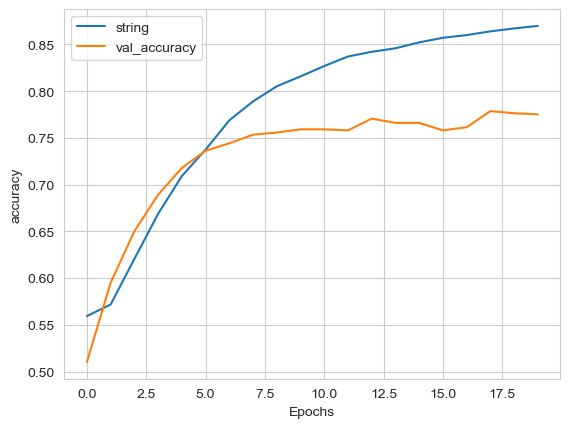

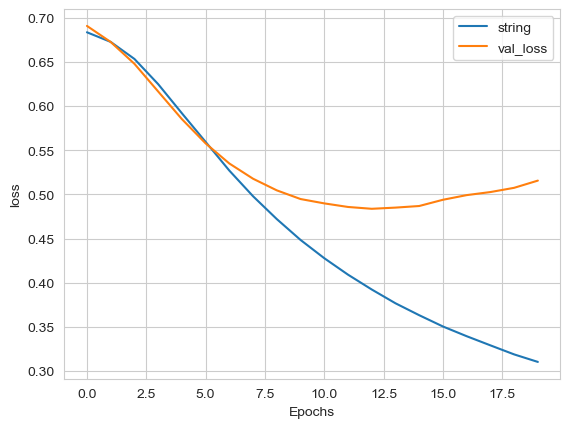

In [25]:
plot_graphs(history,"accuracy")
plot_graphs(history,'loss')

In [26]:
review1  = """I love this movie"""
review2 = """that was the worst movie, i have ever seen"""

In [27]:
new_review = [review1,review2]

In [28]:
def predict_review(model,reviews):
    padding_type = "post"
    sample_sequences = tokenizer.texts_to_sequences(reviews)
    reviews_padded = pad_sequences(sample_sequences,padding=padding_type,maxlen=max_length)
    classes = model.predict(reviews_padded)
    for x in range(len(reviews_padded)):
        print(reviews[x])
        print(classes[x])
        print('\n')

In [29]:
predict_review(model,new_review)

1/1 [==============================] - 0s 275ms/step
I love this movie
[0.6777566]


that was the worst movie, i have ever seen
[0.0525923]




In [30]:
def fit_model_and_show_results(model,reviews):
    model.summary()
    history = model.fit(training_padded,training_labels_final,epochs=num_epochs,validation_data=(validation_padded,validation_labels_final))
    plot_graphs(history,'accuracy')
    plot_graphs(history,'loss')
    predict_review(model,reviews)

In [31]:
# CNN
num_epochs = 30
model_cnn = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length=max_length),
    tf.keras.layers.Conv1D(16,5,activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [32]:
learning_rate = 0.0001
model_cnn.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 50, 16)            64000     
                                                                 
 conv1d (Conv1D)             (None, 46, 16)            1296      
                                                                 
 global_average_pooling1d_1   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 65,313
Trainable params: 65,313
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
313/313 [==============================] - 1s 3ms/step - loss: 0.6878 - accuracy: 0.5590 - val_loss: 0.69

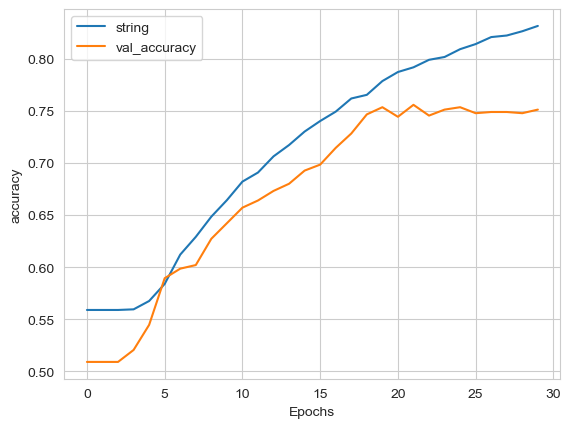

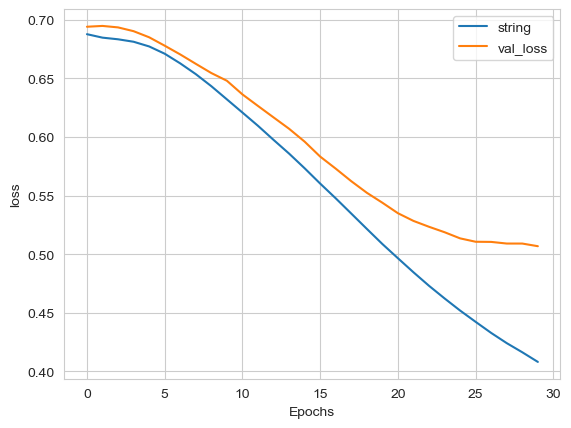

1/1 [==============================] - 0s 66ms/step
I love this movie
[0.6705897]


that was the worst movie, i have ever seen
[0.14652742]




In [33]:
fit_model_and_show_results(model_cnn,new_review)

In [34]:
# Bidirectional LSTM
num_epochs = 30
model_bidi_lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [35]:
learning_rate = 0.00003
model_bidi_lstm.compile(loss='binary_crossentropy',optimizer= tf.keras.optimizers.Adam(learning_rate=learning_rate),metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 50, 16)            64000     
                                                                 
 bidirectional (Bidirectiona  (None, 32)               4224      
 l)                                                              
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 68,257
Trainable params: 68,257
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
313/313 [==============================] - 10s 22ms/step - loss: 0.6907 - accuracy: 0.5571 - val_loss: 0.6931 - val_accuracy: 0.5092
Epoch 2/30
313/313 [==============================] - 7s 22ms/step - loss: 0.6873 - accuracy: 0.5590 - v

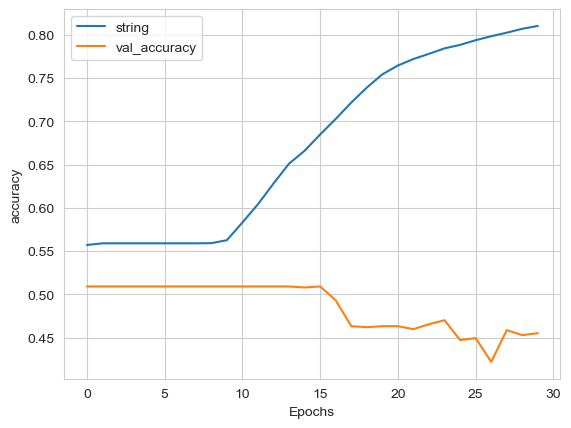

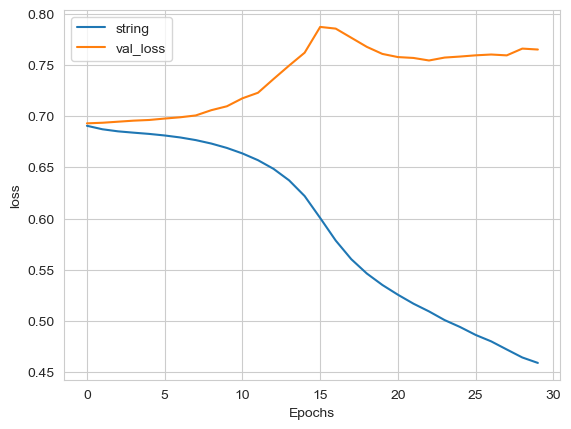

1/1 [==============================] - 1s 638ms/step
I love this movie
[0.6257555]


that was the worst movie, i have ever seen
[0.2287129]




In [36]:
fit_model_and_show_results(model_bidi_lstm,new_review)

In [37]:
# multiple LSTM
model_multiple_bidi_lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim,return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [38]:
learning_rate = 0.0003
model_multiple_bidi_lstm.compile(loss='binary_crossentropy',optimizer= tf.keras.optimizers.Adam(learning_rate=learning_rate),metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 50, 16)            64000     
                                                                 
 bidirectional_1 (Bidirectio  (None, 50, 32)           4224      
 nal)                                                            
                                                                 
 bidirectional_2 (Bidirectio  (None, 32)               6272      
 nal)                                                            
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 74,529
Trainable params: 74,529
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
313/313 [==============================

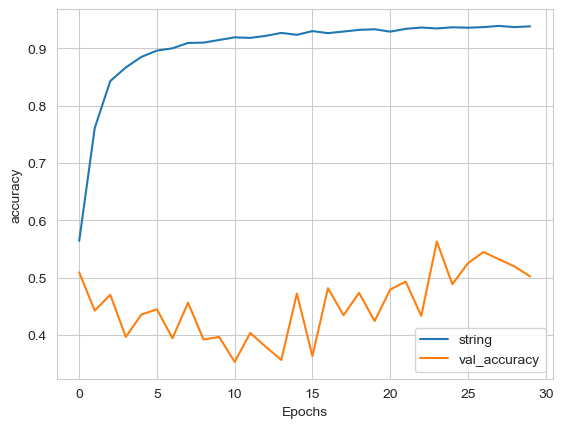

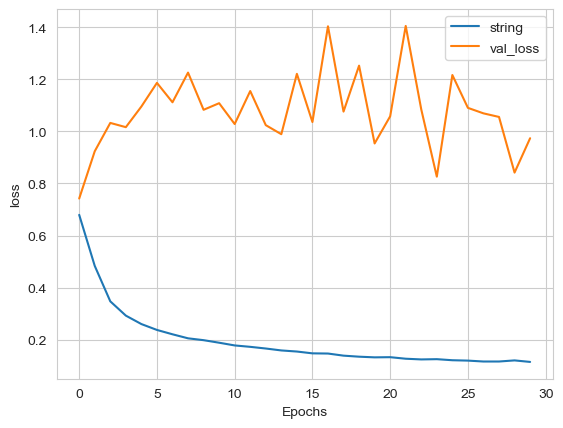

1/1 [==============================] - 2s 2s/step
I love this movie
[0.99772483]


that was the worst movie, i have ever seen
[0.27026585]




In [39]:
fit_model_and_show_results(model_multiple_bidi_lstm,new_review)